In [52]:
from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=63ab56a87296a4cf34a255944e63da3262a65da094d0e67753ce2a6c5c81a5c3
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
trainfile = r'/gdrive/My Drive/ASSIGNMENT5/CreditCardClustering.csv'
cc_data = pd.read_csv(trainfile) #creates a dataframe

In [3]:
#EDA
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
cc_data.isnull().sum()

#we see that minimum_payments has 313 null values and credit_limit has 1 null value

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
#dropping cust_id column 
CUST_ID=cc_data['CUST_ID']
CUST_ID=pd.DataFrame(CUST_ID,columns=['CUST_ID'])


In [6]:
# dropping the custid columns here.
cc_data1 = cc_data.drop('CUST_ID', axis=1)

In [7]:
cc_data1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
#Handling missing values

cc_data1['CREDIT_LIMIT'].fillna(cc_data1['CREDIT_LIMIT'].median(),inplace=True)
cc_data1['MINIMUM_PAYMENTS'].fillna(cc_data1['MINIMUM_PAYMENTS'].median(),inplace=True)


In [9]:
cc_data1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
#K-means clustering
kmeans = KMeans()
kmeans.fit(cc_data1)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
#Print Silhouette measure
print(silhouette_score(cc_data1, kmeans.labels_))
print(cc_data1.shape)


[0 6 3 ... 0 0 0]
[[7.83713483e+02 8.50472491e-01 4.96041156e+02 2.39114231e+02
  2.57229239e+02 4.43645695e+02 4.51285368e-01 1.29143373e-01
  3.47373069e-01 1.07563996e-01 2.19357921e+00 9.35505446e+00
  2.11962301e+03 8.55676092e+02 5.21236331e+02 1.43562421e-01
  1.13649914e+01]
 [2.40753599e+03 9.70713122e-01 6.59616436e+03 4.43885039e+03
  2.15910501e+03 5.18286787e+02 9.12911206e-01 6.99289916e-01
  7.06731513e-01 6.89732896e-02 1.87761194e+00 7.41104478e+01
  8.00552239e+03 6.52888444e+03 1.21954973e+03 3.17519081e-01
  1.19253731e+01]
 [5.18654887e+03 8.75580741e-01 1.45951580e+03 8.71786250e+02
  5.87925982e+02 1.09266883e+04 3.53224509e-01 1.93785732e-01
  2.76302580e-01 4.96222741e-01 2.07857143e+01 1.84464286e+01
  1.08566964e+04 1.56315412e+04 2.07435966e+03 1.46442679e-01
  1.16785714e+01]
 [8.87451843e+02 8.71172084e-01 1.20487294e+03 7.03754597e+02
  5.01339437e+02 2.28695223e+02 6.18963113e-01 3.30508720e-01
  4.28704901e-01 4.95178561e-02 9.33255949e-01 1.89268717e+0

In [11]:
#manual hyperparamater tuning

kmeans2 = KMeans(n_clusters=4, init="k-means++", n_init=4**3, max_iter=300)
kmeans2.fit(cc_data1)
print(kmeans2.labels_)
print(kmeans2.cluster_centers_)
#Print Silhouette measure
print(silhouette_score(cc_data1, kmeans2.labels_))
print(cc_data1.shape)

[1 2 2 ... 1 1 1]
[[4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [8.53149669e+02 8.53006067e-01 6.00405279e+02 3.10569922e+02
  2.90137805e+02 4.95427066e+02 4.66419083e-01 1.52755777e-01
  3.51940190e-01 1.07245529e-01 2.26400745e+00 1.06138445e+01
  2.71379382e+03 9.94389502e+02 5.06491672e+02 1.56392163e-01
  1.14279063e+01]
 [3.29867740e+03 9.40274275e-01 1.57929646e+03 9.94460470e+02
  5.85144858e+02 2.06973953e+03 5.43268435e-01 3.22578754e-01
  3.84385855e-01 2.07984228e-01 5.65056083e+00 2.20547886e+01
  8.99042474e+03 2.85201422e+03 1.17004260e+03 1.39877871e-01
  1.17377049e+01]
 [4.74899179e+03 9.07785699e-01 1.04656364e+04 7.44002466e+03
  3.02577714e+03 5.40999390e+03 7.35406684e-01 5.85385564e-01
  5.89869173e-01 2.29575541e-01 9.19548872e+00 8.34736842e+0

In [12]:
#manual hyperparamater tuning

kmeans3 = KMeans(n_clusters=5, init="k-means++", n_init=4**3, max_iter=100)
kmeans3.fit(cc_data1)
print(kmeans3.labels_)
print(kmeans3.cluster_centers_)
#Print Silhouette measure
print(silhouette_score(cc_data1, kmeans3.labels_))
print(cc_data1.shape)

[1 4 4 ... 1 1 1]
[[4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [7.97232036e+02 8.50588708e-01 5.25018031e+02 2.58543271e+02
  2.66765342e+02 4.87248088e+02 4.54401905e-01 1.34272116e-01
  3.48382683e-01 1.08894605e-01 2.28594363e+00 9.72172672e+00
  2.27206336e+03 9.20495071e+02 5.05665813e+02 1.48963905e-01
  1.13877988e+01]
 [5.68991011e+03 9.52798781e-01 2.72246142e+03 1.71101336e+03
  1.01157810e+03 4.60267535e+03 5.34779750e-01 3.34445363e-01
  4.08838192e-01 3.24305972e-01 1.04371345e+01 3.33435673e+01
  1.14045388e+04 6.73080401e+03 2.08962896e+03 1.15775683e-01
  1.17295322e+01]
 [5.40533094e+03 9.57954542e-01 2.72763637e+04 2.18771029e+04
  5.39926083e+03 1.55037839e+03 9.09027750e-01 8.42361167e-01
  7.20833292e-01 5.90277500e-02 2.50000000e+00 1.27958333e+0

In [13]:
#manual hyperparamater tuning

kmeans4 = KMeans(n_clusters=3, init="k-means++", n_init=4**3, max_iter=150)
kmeans4.fit(cc_data1)
print(kmeans4.labels_)
print(kmeans4.cluster_centers_)
#Print Silhouette measure
print(silhouette_score(cc_data1, kmeans4.labels_))
print(cc_data1.shape)

[0 1 1 ... 0 0 0]
[[8.56217996e+02 8.54514247e-01 6.05627248e+02 3.13750275e+02
  2.92174891e+02 4.95391096e+02 4.68030368e-01 1.54606671e-01
  3.52427754e-01 1.06746545e-01 2.25332518e+00 1.06870509e+01
  2.75776236e+03 9.98424655e+02 5.62006916e+02 1.57107891e-01
  1.14341844e+01]
 [3.41030350e+03 9.40646133e-01 1.58607534e+03 9.91450176e+02
  5.94939315e+02 2.12845752e+03 5.39465416e-01 3.17145422e-01
  3.85234021e-01 2.11435378e-01 5.76656428e+00 2.21777095e+01
  9.02358690e+03 2.90727330e+03 1.56183852e+03 1.33664657e-01
  1.17376042e+01]
 [4.84189326e+03 9.11252077e-01 1.07893056e+04 7.61968438e+03
  3.16979046e+03 5.15222013e+03 7.52377608e-01 5.99535492e-01
  6.04122562e-01 2.26540108e-01 9.20000000e+00 8.62000000e+01
  1.24657692e+04 1.81174305e+04 2.51075643e+03 3.34474108e-01
  1.18384615e+01]]
0.46693427423079836
(8950, 17)


In [14]:
labels_sample = kmeans4.labels_


In [15]:
cc_data1['Cluster Number'] = labels_sample
labels_sample

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [16]:
import seaborn as sns

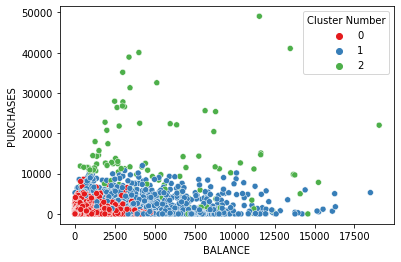

In [17]:
sns.set_palette('Set2')
sns.scatterplot(cc_data1['BALANCE'],cc_data1['PURCHASES'],hue=cc_data1['Cluster Number'],palette='Set1')

#Cluster 0: Moderate to high balance and low to moderate purchases
#Cluster 1: Low balance and low purchases 
#Cluster 2: Moderate balance and high purchases 

In [18]:
import matplotlib.pyplot as plt

In [19]:
data_viz1 = cc_data1[['BALANCE','PURCHASES_FREQUENCY','CASH_ADVANCE','INSTALLMENTS_PURCHASES','CREDIT_LIMIT','Cluster Number']]

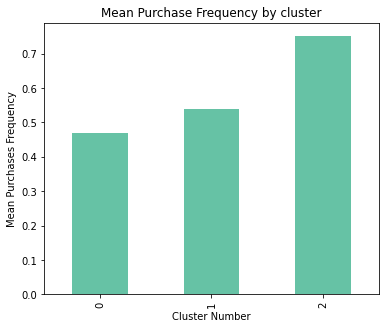

In [20]:
dfg = data_viz1.groupby('Cluster Number')['PURCHASES_FREQUENCY'].mean()

dfg.plot(kind='bar', title='Mean Purchase Frequency by cluster', ylabel='Mean Purchases Frequency',
         xlabel='Cluster Number', figsize=(6, 5))

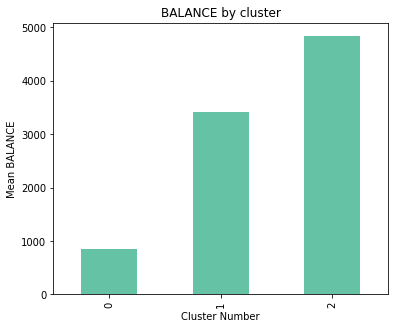

In [21]:
dfg = data_viz1.groupby('Cluster Number')['BALANCE'].mean()

dfg.plot(kind='bar', title='BALANCE by cluster', ylabel='Mean BALANCE',
         xlabel='Cluster Number', figsize=(6, 5))

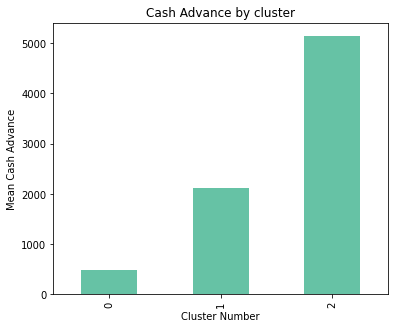

In [22]:
dfg = data_viz1.groupby('Cluster Number')['CASH_ADVANCE'].mean()

dfg.plot(kind='bar', title='Cash Advance by cluster', ylabel='Mean Cash Advance',
         xlabel='Cluster Number', figsize=(6, 5))

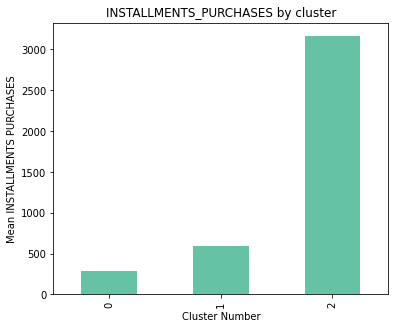

In [23]:
dfg = data_viz1.groupby('Cluster Number')['INSTALLMENTS_PURCHASES'].mean()

dfg.plot(kind='bar', title='INSTALLMENTS_PURCHASES by cluster', ylabel='Mean INSTALLMENTS PURCHASES',
         xlabel='Cluster Number', figsize=(6, 5))

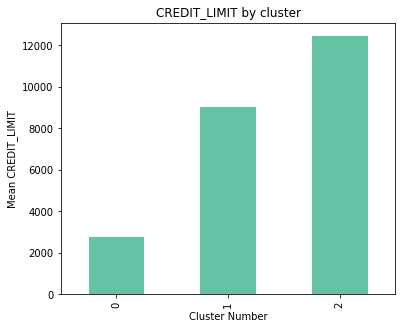

In [24]:
dfg = data_viz1.groupby('Cluster Number')['CREDIT_LIMIT'].mean()

dfg.plot(kind='bar', title='CREDIT_LIMIT by cluster', ylabel='Mean CREDIT_LIMIT',
         xlabel='Cluster Number', figsize=(6, 5))

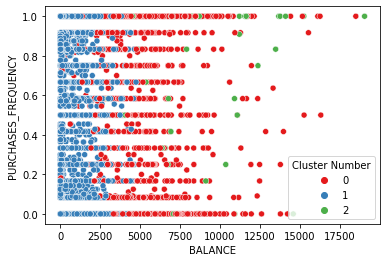

In [46]:
sns.set_palette('Set2')
sns.scatterplot(cc_data1['BALANCE'], cc_data1['PURCHASES_FREQUENCY'],hue=cc_data1['Cluster Number'],palette='Set1')


In [47]:
labels2 = kmeans4.fit_predict(cc_data1)

In [48]:
creditcard_df_cluster = pd.concat([cc_data1, pd.DataFrame({'cluster': labels2})], axis = 1)

In [49]:
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label,Cluster Number,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,1,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,0,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2,0,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2,0,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,1,0


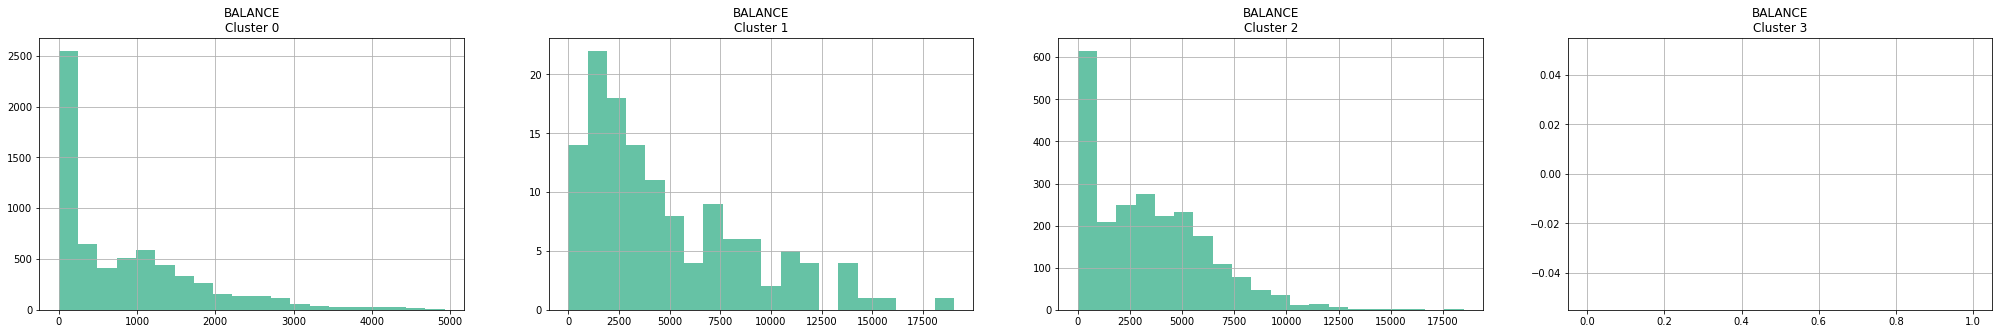

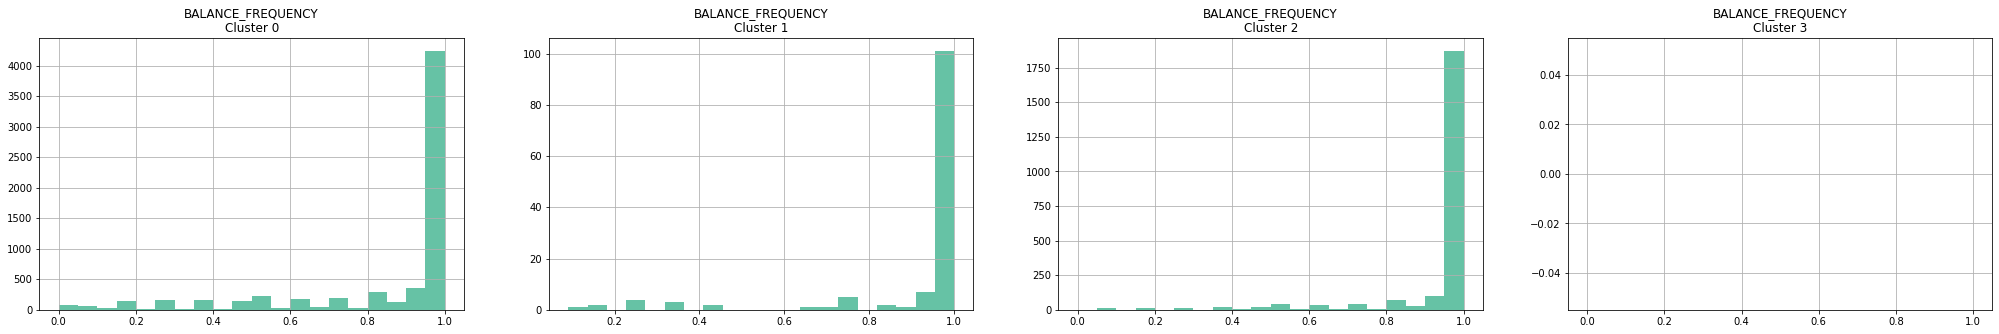

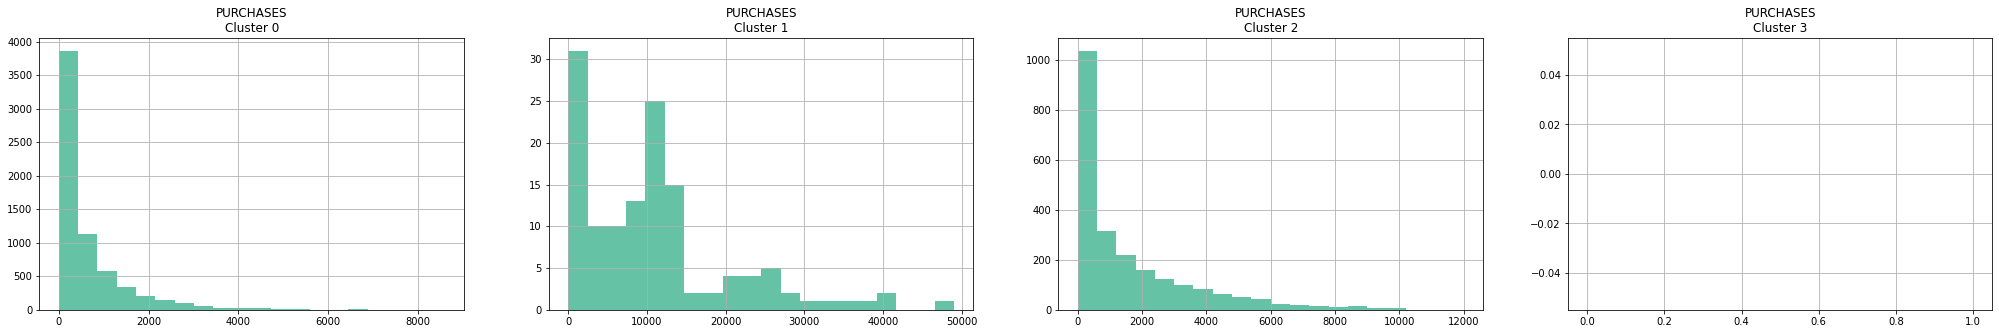

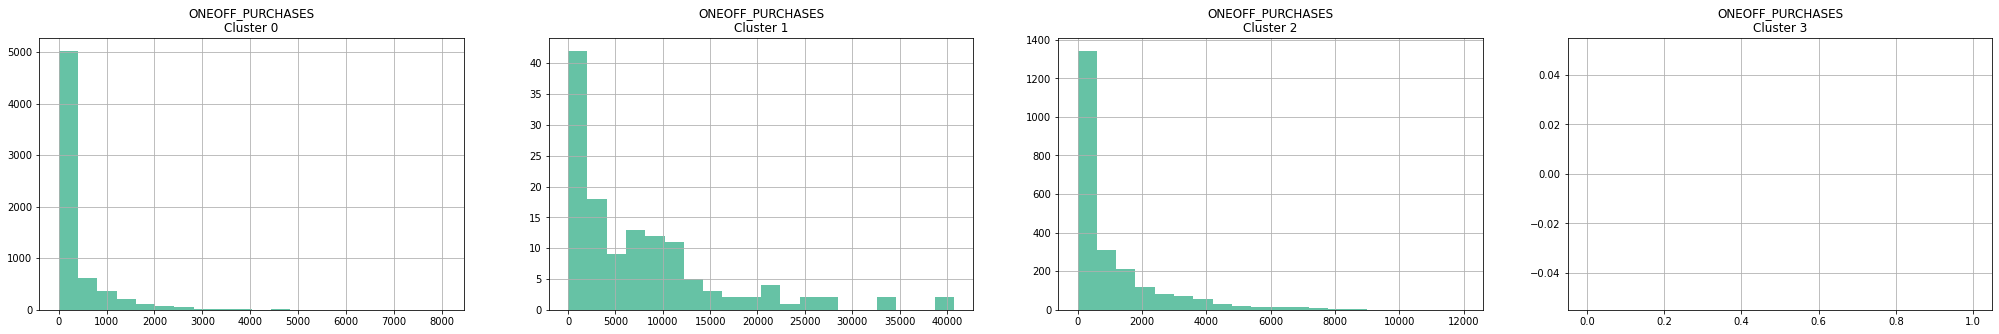

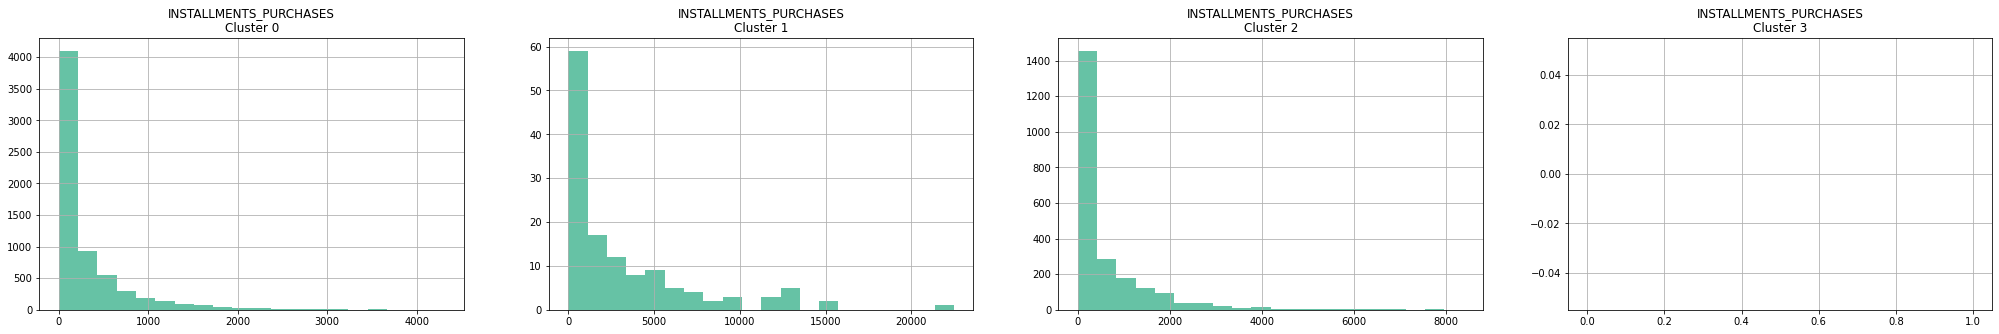

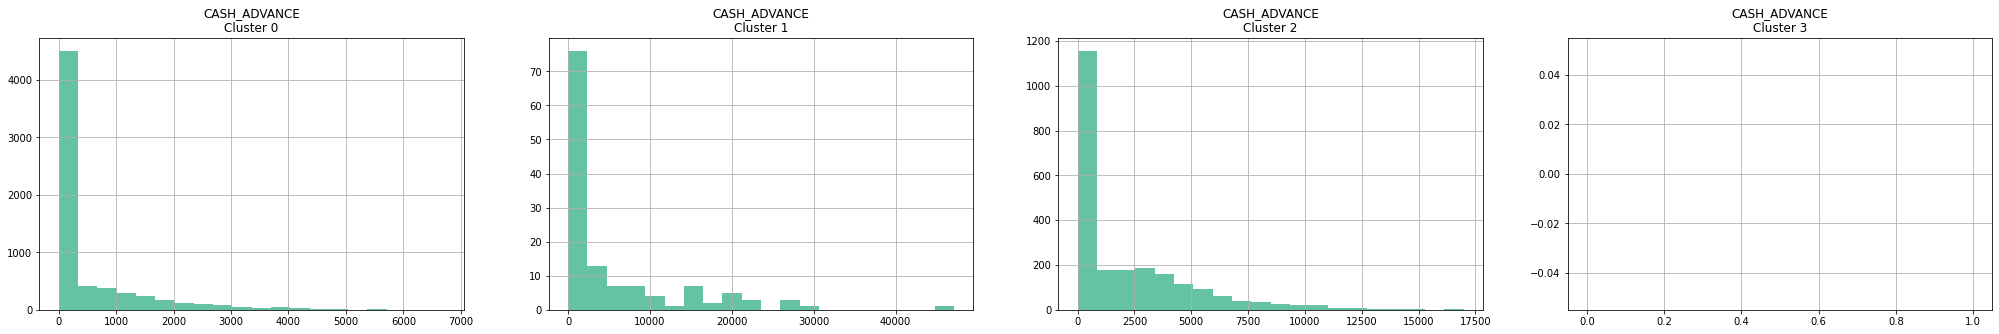

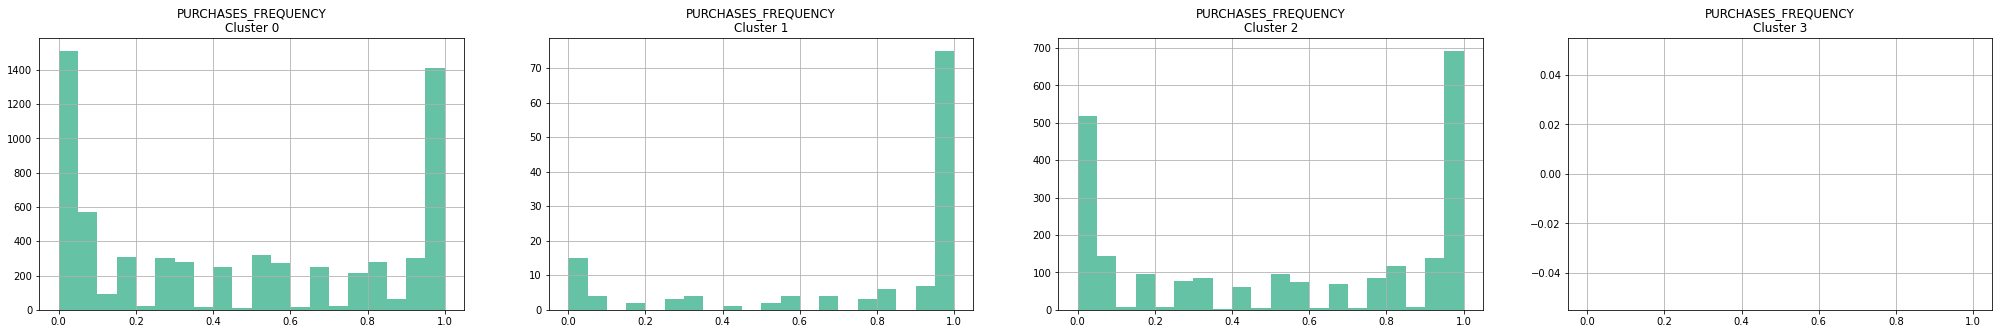

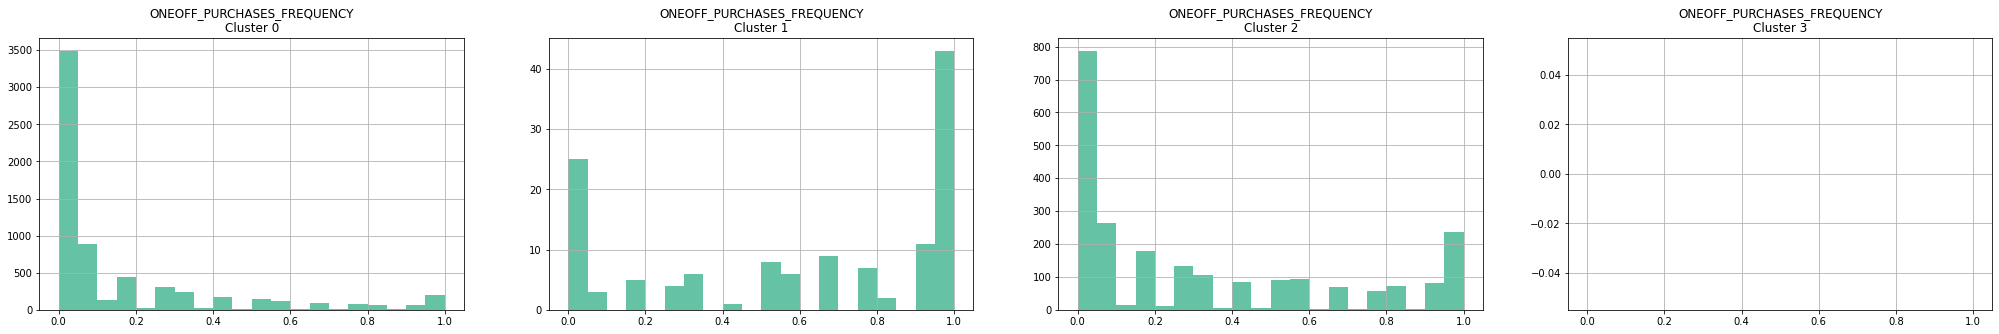

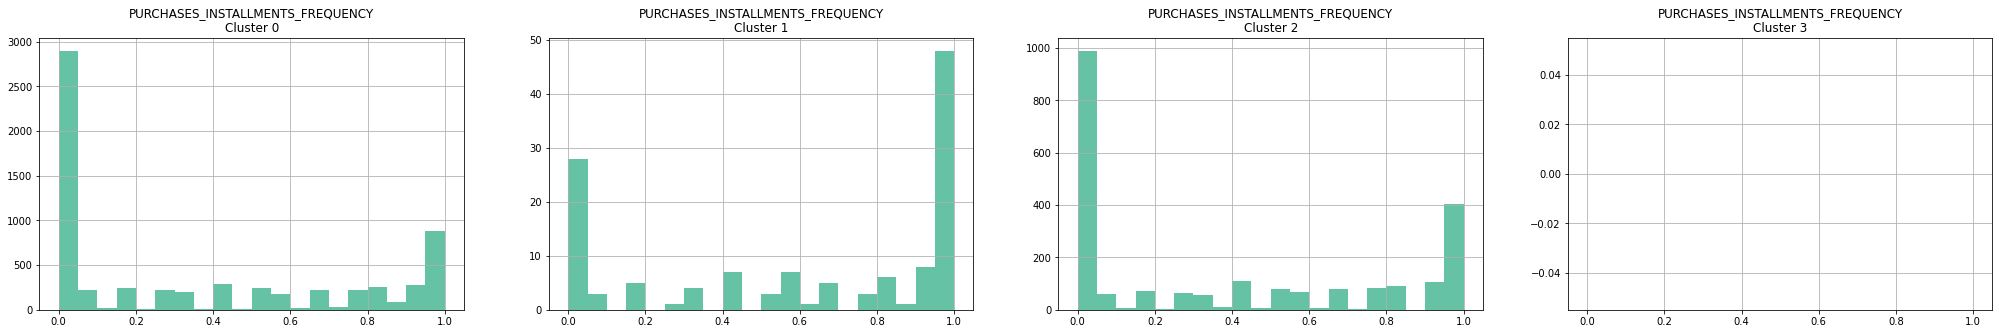

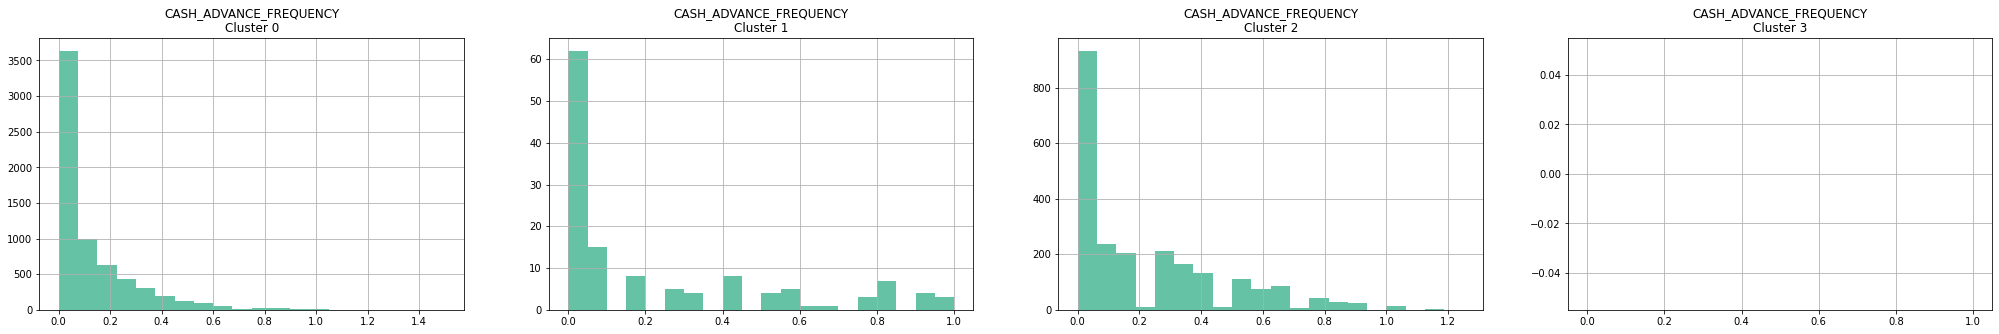

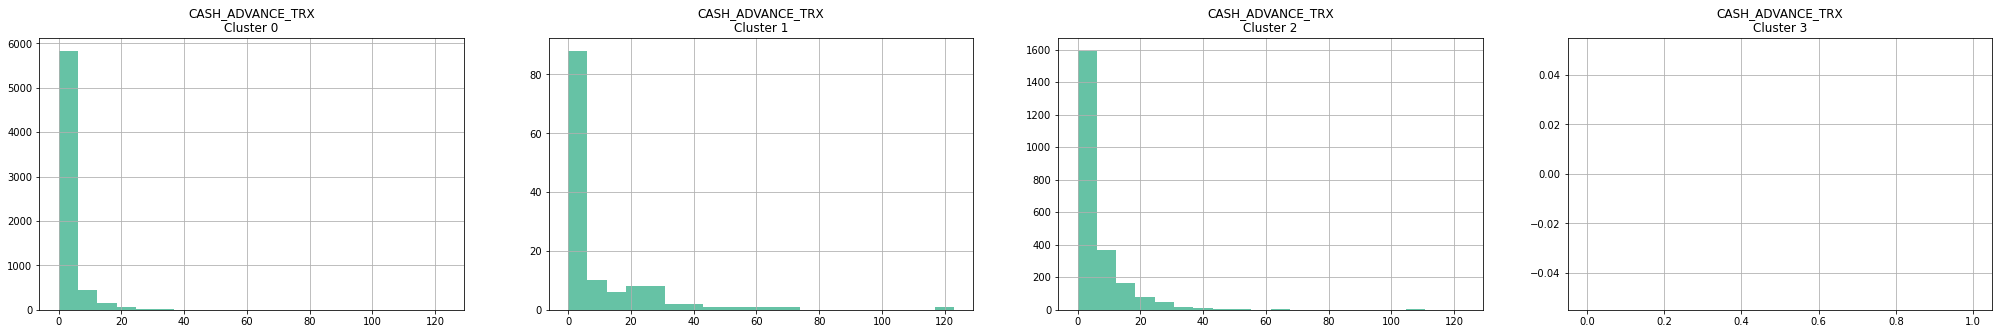

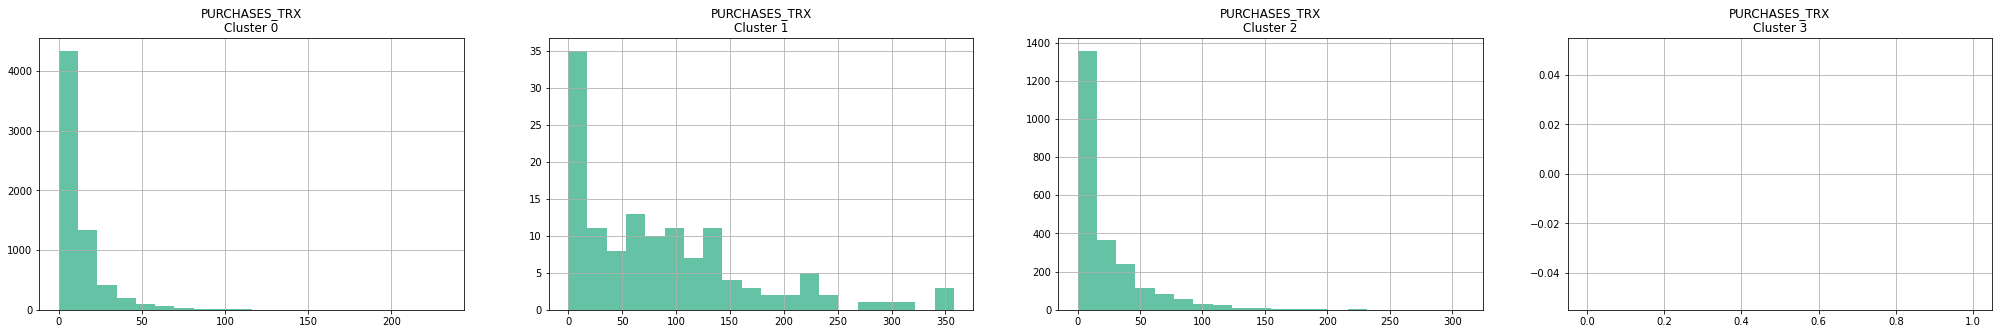

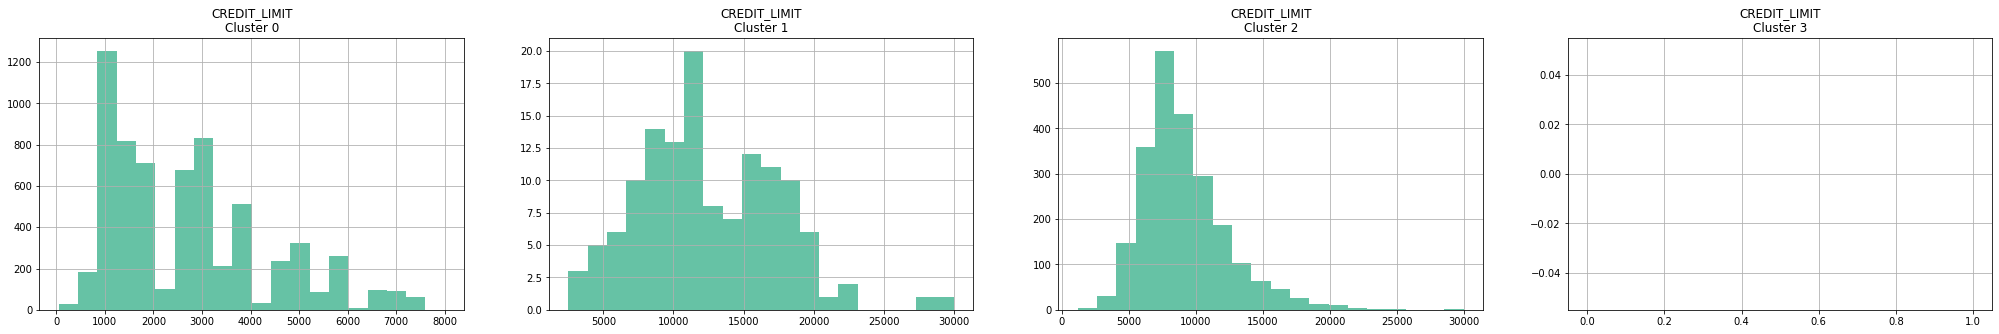

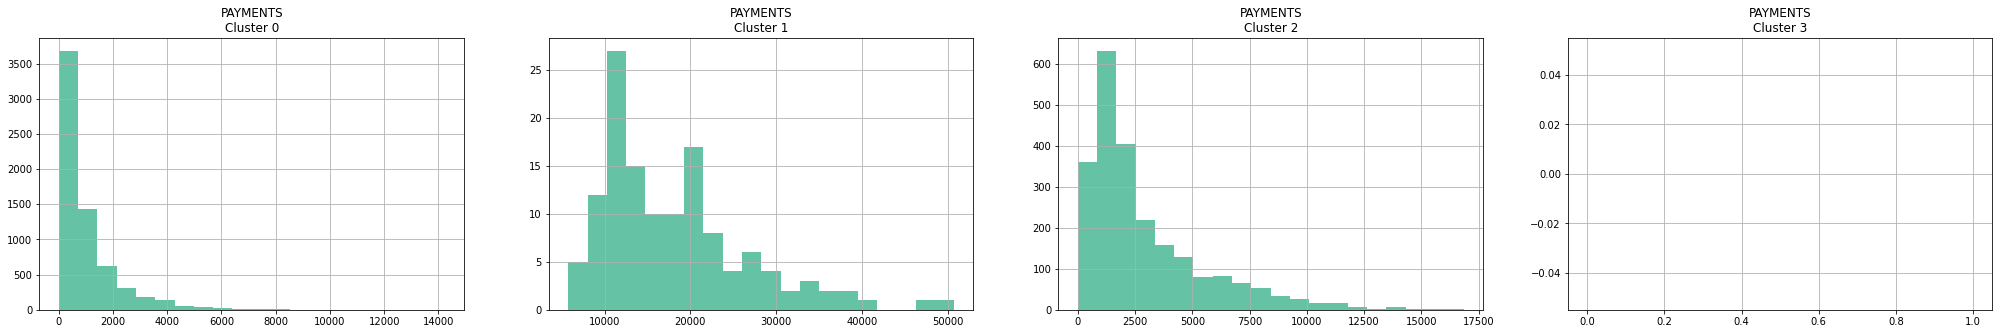

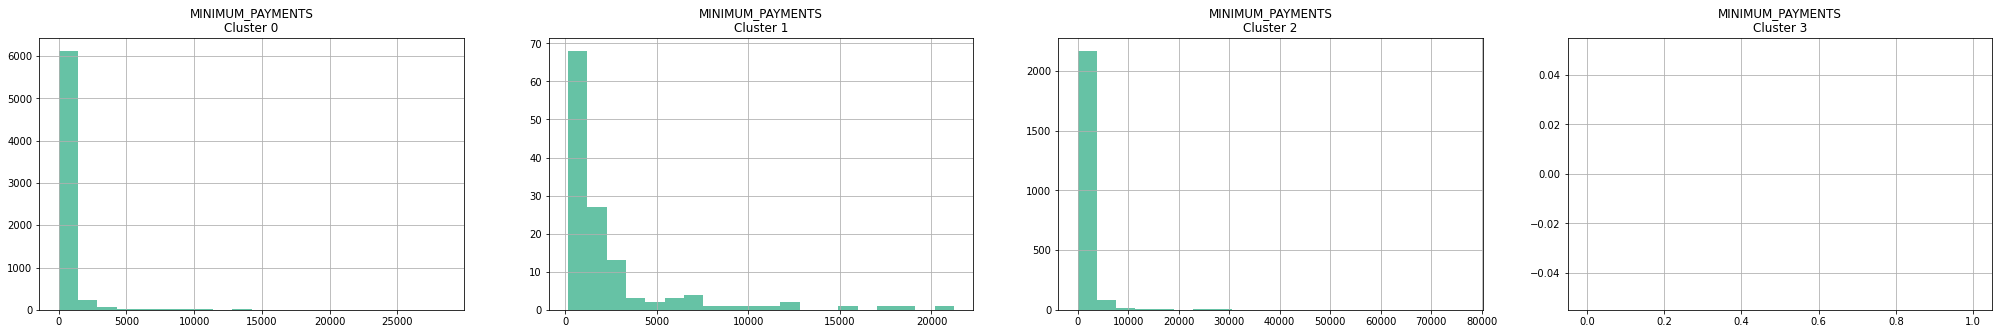

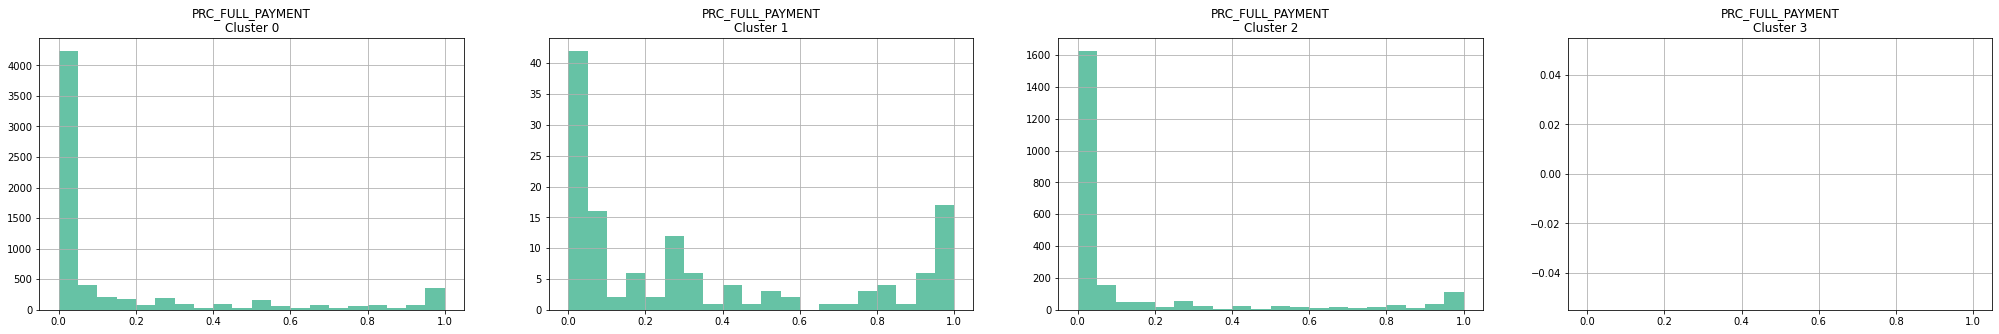

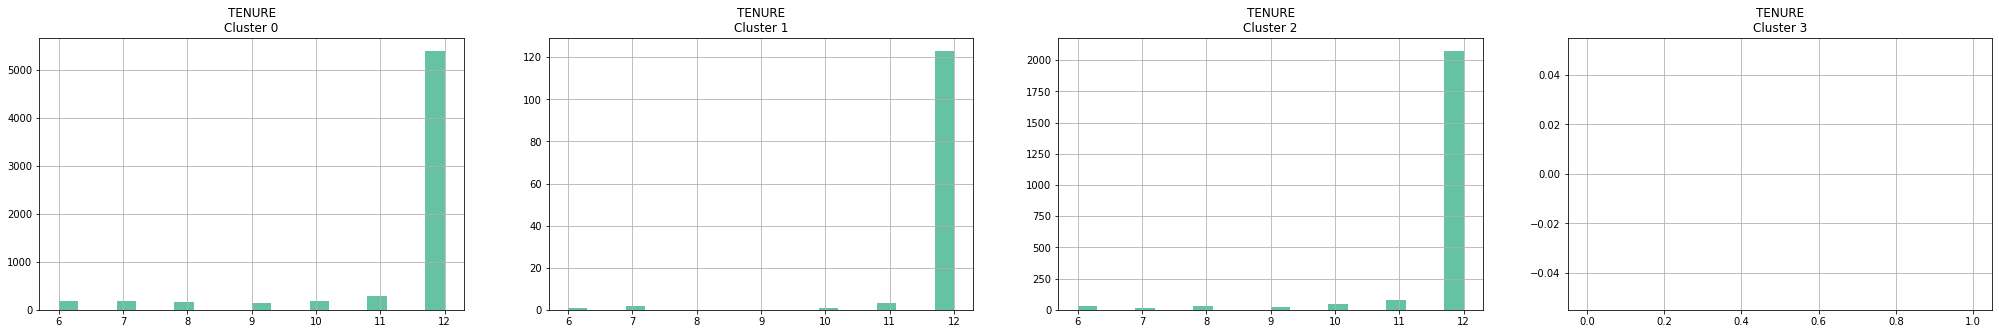

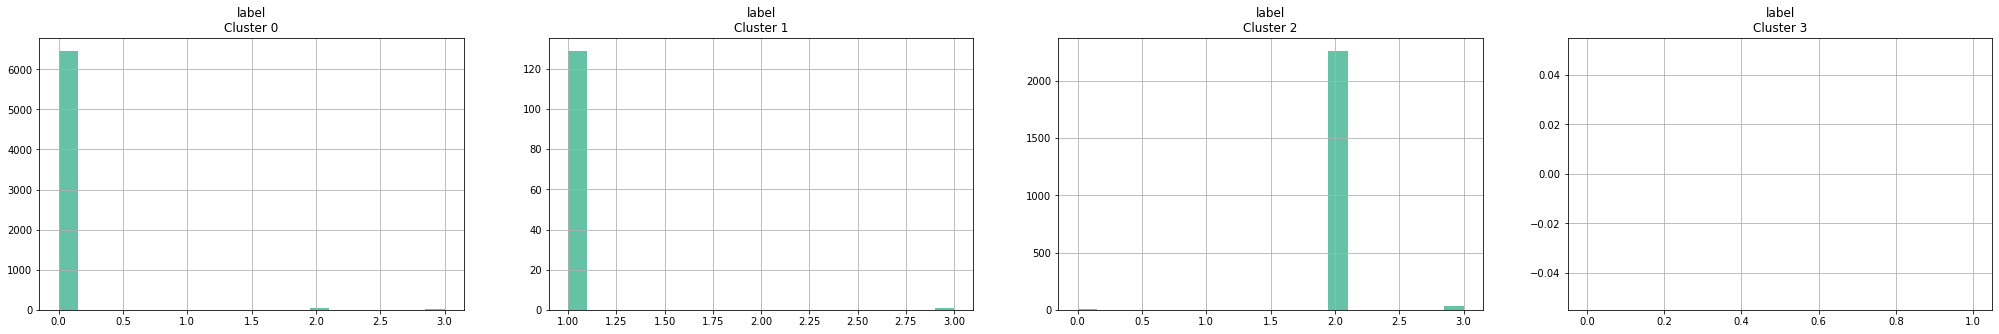

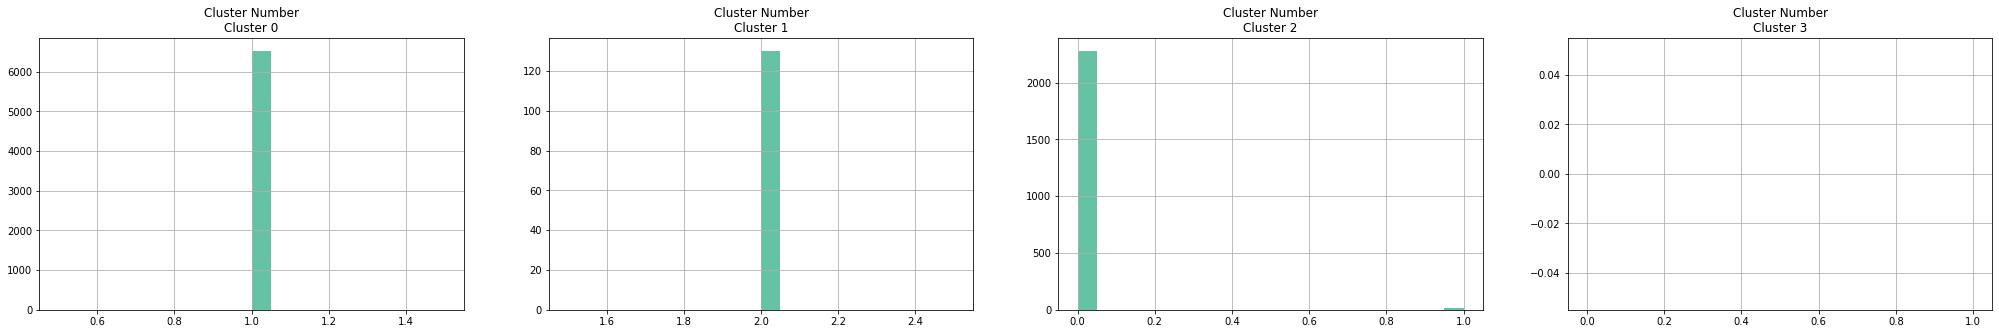

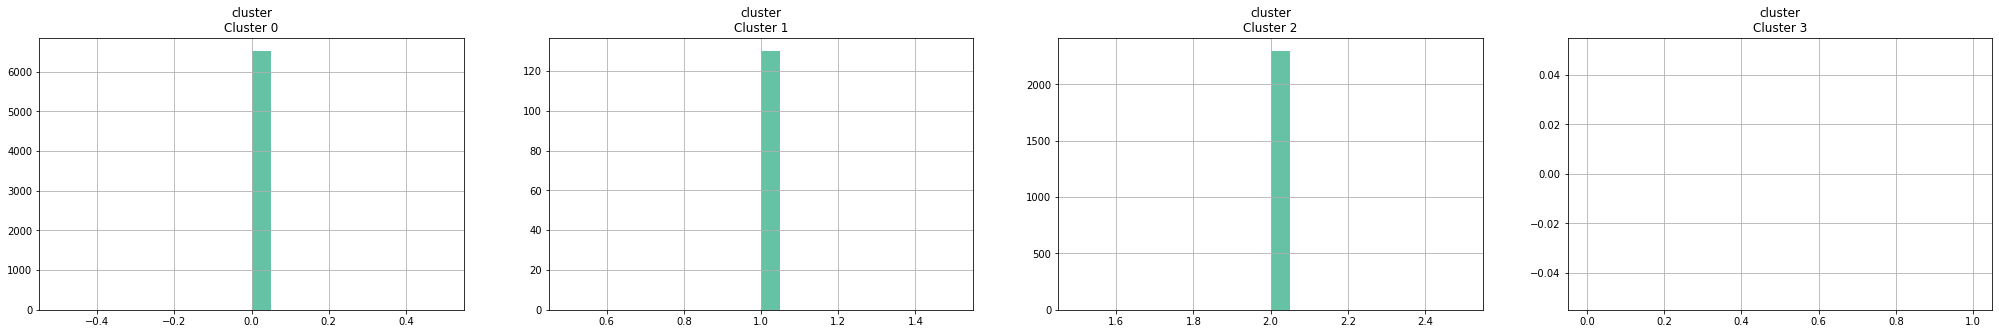

In [50]:
#--each row of figures represents feature distribution for each cluster-----#
for i in creditcard_df_cluster.columns:
    plt.figure(figsize = (35, 5))
    for j in range(4):
        plt.subplot(1, 4, j+1)
        cluster = creditcard_df_cluster[ creditcard_df_cluster['cluster'] == j ]
        
        cluster[i].hist(bins  = 20)
        plt.title( '{}\nCluster {}'.format(i, j))
plt.show()